# **Assignment: Beautiful Soup**



> Group name : Insurgents_Sales Prediction 



> Group Submission by


1.   Chaitrali Deshmukh(012501489)
2.   Prathyusha Kasibhatta(013774163)
3.   Sandhya Gadgoli(013798759)
4.   Saylee Vyawahare(013801294)

Beautiful Soup is a python library for pulling data out of HTML and XML files. It provides idiomatic ways of navigating, searching, and modifying the parse tree. Here, we have used Beautiful Soup for scraping the prices Data from Amazon.
Web Scraping is the process of extracting data from websites. It will access the world wide web using the HTTP or through a web browser. We created a "scraper" which sends a "GET" query to the website. Then, it parses the HTML document based on the received result. Then, it searches for the data we gave as input.

We followed the below steps as part of web scraping:
1. Data Loading and Processing for scraping
2. Identifying the structure of the web page
3. Create scraping code
4. Isolating the results
5. Parse the output
6. Comparison


In [0]:
import urllib.request
from urllib.request import HTTPError
from bs4 import BeautifulSoup

## Data Loading and Processing

1. We have loaded both original dataset and cleaned dataset.
2. We have retrieved 'Item_Type' from the original dataset which is used as an input for web scraping
3. We have processed the data in 'Item_Type' by removing the spaces and adding the new values for few rows which cannot be used for scraping.
4. We have added this column to the cleaned dataset which is out target data.

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd

#loading the dataset
olddataset = pd.read_csv('/content/drive/My Drive/train_beautifulsoup.csv')
olddataset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [0]:
#loading the dataset
dataset = pd.read_csv('/content/drive/My Drive/train_modified_beautifulsoup.csv')
dataset.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,Item_Type_0,Item_Type_1,Item_Type_2,Item_Type_3,Item_Type_4,Item_Type_5,Item_Type_6,Item_Type_7,Item_Type_8,Item_Type_9,Item_Type_10,Item_Type_11,Item_Type_12,Item_Type_13,Item_Type_14,Item_Type_15
0,FDP36,10.395000,0.073297,51.4008,OUT018,2009,556.6088,3,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,FDW12,12.792854,0.035400,144.5444,OUT027,1985,4064.0432,5,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,FDC37,12.792854,0.057557,107.6938,OUT019,1985,214.3876,4,1,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,FDL12,15.850000,0.121633,60.6220,OUT046,1997,2576.6460,8,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,FDL12,15.850000,0.121532,59.2220,OUT013,1987,599.2200,1,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
def getItemType():
  x = []
  for i, type in enumerate(olddataset['Item_Type']):
    if type == 'Health and Hygiene':
      x.append("Healthandbeauty")
    elif type == "Fruits and Vegetables":
      x.append("Vegetables")
    elif type == "Others":
      x.append("Electronicaccessories")
    elif type == "Baking Goods":
      x.append("Baking")
    else:
      x.append(type.replace(" ", ""))
  return x

#Modify items types for scraping 
dataset['Item_Type'] = getItemType()
dataset.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,Item_Type_0,Item_Type_1,Item_Type_2,Item_Type_3,Item_Type_4,Item_Type_5,Item_Type_6,Item_Type_7,Item_Type_8,Item_Type_9,Item_Type_10,Item_Type_11,Item_Type_12,Item_Type_13,Item_Type_14,Item_Type_15,Item_Type
0,FDP36,10.395000,0.073297,51.4008,OUT018,2009,556.6088,3,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Dairy
1,FDW12,12.792854,0.035400,144.5444,OUT027,1985,4064.0432,5,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,SoftDrinks
2,FDC37,12.792854,0.057557,107.6938,OUT019,1985,214.3876,4,1,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Meat
3,FDL12,15.850000,0.121633,60.6220,OUT046,1997,2576.6460,8,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Vegetables
4,FDL12,15.850000,0.121532,59.2220,OUT013,1987,599.2200,1,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Household


## Identifying the structure of the web page

We have decided to use the Amazon website for retrieving the prices of the products. So, we used chrome's developer tools to inspect the site's HTML structure. As we don't need all the data from the websites, we just used the specific classes and IDs which will give us just the price of the products. 


## Create scraping code

We have created a function that will hit the amazon website and retrieve the results. We have used 'urllib.request' for requesting the data from the website. It will take the input URL and opens and returns the content of the web page which should be processed later.

In [0]:
#Scrap prices of all products from amazon
def scrapData(type):
  site = 'https://www.amazon.com/s?k=' + type +'&ref=nb_sb_noss_2'
  hdr = {'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.11 (KHTML, like Gecko) Chrome/23.0.1271.64 Safari/537.11',
       'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8',
       'Accept-Charset': 'ISO-8859-1,utf-8;q=0.7,*;q=0.3',
       'Accept-Encoding': 'none',
       'Accept-Language': 'en-US,en;q=0.8',
       'Connection': 'keep-alive'}

  req = urllib.request.Request(site, headers=hdr)

  try:
    page = urllib.request.urlopen(req)
    return page
  except HTTPError as e:
    print(e.read())
    


## Isolating the results

The scrapper we created returns all the content of the webpage. As we don't understand all the data, we followed the below steps to retrieve the desired output.

1. We don't want to overload the server with our requests. So, after every URL hit, it will sleep for 10 seconds.
2. Next, we used Beautiful soup to parse the HTML content
2. We used the class "a-offscreen" as our identifier for the product price. So, by using that class name, we have successfully retrieved all the product prices.
4. We have added all these values to a new column 'Online_Price'.

In [0]:
#Get Online MRP
def getOnlineMRP(type):
  price_list = []
  price = []
  pageOutput = scrapData(type)
  data = pageOutput.read()
  soup = BeautifulSoup(data, 'html.parser')
  for priceData in soup.find_all('span', attrs={'class': 'a-offscreen'}):
    price = priceData.text
  if price is None:
     price_list.append('5')
  else:
    price_list.append(price)    
  return price_list[0]
  

In [0]:
#For every item, get the online price and sleep for 10 seconds
import time
def retrieveOnlinePrice():
  x = []
  for i, type in enumerate(dataset['Item_Type']):
    x.append(getOnlineMRP(type))
    time.sleep(10)
  return x

In [0]:
#Append the new prices to 'Online_Price'
dataset['Online_Price'] = retrieveOnlinePrice()


## Parsing the output
1. We have processed the output in the 'Online_Price' column so that we can use analyzing tools on it.
2. We have removed the '$' symbols for the price.
3. We have converted the values to the floating-point numbers to match it with the values in the 'Item_MRP' and also handled missing values.

In [0]:
#Format the prices
def formatOnlinePrice():
  x = []
  old_MRP = olddataset['Item_MRP']
  for i, type in enumerate(dataset['Online_Price']):
    if len(type) == 0:
      x.append(float(old_MRP[i]))
    else:
      x.append(float(type.translate({ord('$'): None})))
  return x

dataset['Online_Price'] = formatOnlinePrice()  
dataset.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,Item_Type_0,Item_Type_1,Item_Type_2,Item_Type_3,Item_Type_4,Item_Type_5,Item_Type_6,Item_Type_7,Item_Type_8,Item_Type_9,Item_Type_10,Item_Type_11,Item_Type_12,Item_Type_13,Item_Type_14,Item_Type_15,Item_Type,Online_Price
0,FDP36,10.395000,0.073297,51.4008,OUT018,2009,556.6088,3,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Dairy,34.9500
1,FDW12,12.792854,0.035400,144.5444,OUT027,1985,4064.0432,5,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,SoftDrinks,12.0100
2,FDC37,12.792854,0.057557,107.6938,OUT019,1985,214.3876,4,1,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Meat,38.9900
3,FDL12,15.850000,0.121633,60.6220,OUT046,1997,2576.6460,8,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Vegetables,20.9200
4,FDL12,15.850000,0.121532,59.2220,OUT013,1987,599.2200,1,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Household,53.8614


# Results Comparison
From the graphs below, we can see that the prices on online websites are comparatively lesser than in retail stores.

1. Products like Dairy, Soft drinks, Meat, Vegetables, Household, Baking, Breakfast, Hard drinks, Bread are cheaper on Amazon than in the retail store.
2. Products like Snacks, health and beauty are cheaper in retail store than on Amazon.
3. Canned products, Frozen foods, and Starchy foods are almost equal in both retail store and Amazon.

(array([-100.,    0.,  100.,  200.,  300.]),
 <a list of 5 Text xticklabel objects>)

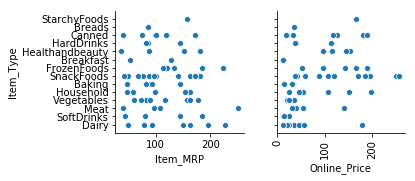

In [0]:
pp = sns.pairplot(data=dataset,
                  y_vars=['Item_Type'],
                  x_vars=['Item_MRP', 'Online_Price'])
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

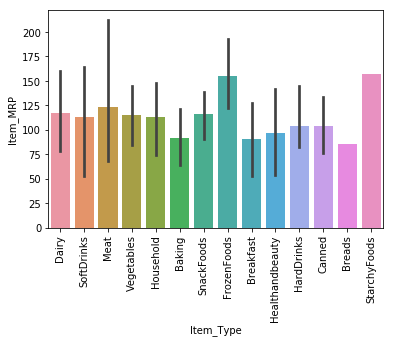

In [0]:
ax = sns.barplot(x="Item_Type", y="Item_MRP", data=dataset)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

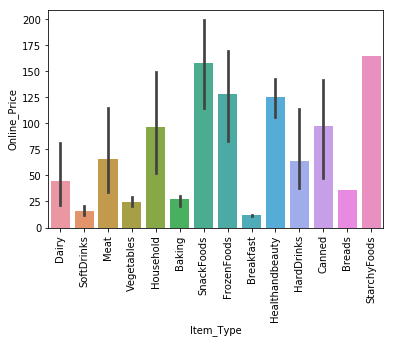

In [0]:
ax = sns.barplot(x="Item_Type", y="Online_Price", data=dataset)
plt.xticks(rotation=90)

## Conclusion

In this assignment, we have used both the original dataset and the cleaned data frame. Values of 'Item_Type' in the original dataset are parsed and sent as input to the web scrapper and the results are parsed, cleaned and stored in the cleaned dataset. We have compared both the retail prices and online prices and observed that more products are cheaper online than in the retail store.